§ Welcome to M5 project §



In [86]:
import pandas as pd
from pandas_profiling import ProfileReport
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import plotly
from plotly.subplots import make_subplots
import plotly.graph_objects as go

from fbprophet import Prophet
from fbprophet.plot import add_changepoints_to_plot
from fbprophet.diagnostics import cross_validation
from fbprophet.diagnostics import performance_metrics
from fbprophet.plot import plot_cross_validation_metric





from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"


In [15]:
calendar = pd.read_csv('calendar.csv')
df = pd.read_csv('sales_train_evaluation.csv')
prices = pd.read_csv('sell_prices.csv')



# profile = ProfileReport(df, title='Pandas Profiling Report', explorative=True, progress_bar=True)                
# profile.to_file("raw_report.html")

In [3]:
size = round(df.memory_usage(deep=True).sum() / 1024 ** 2, 2)
print(f'Dataframe `df` has {size} MB')

Dataframe `df` has 463.29 MB


In [6]:
df = df.set_index('id')

In [7]:
day_columns = [col for col in df.columns if 'd_' in col]

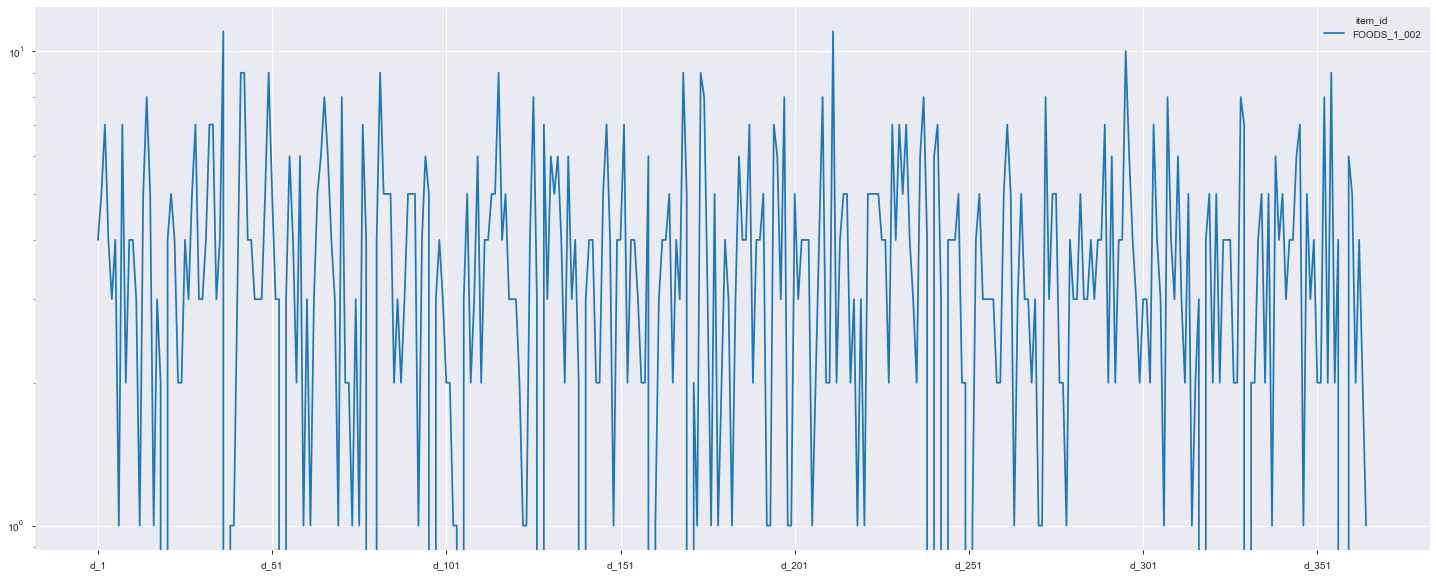

In [93]:
"""

Vision by item
Time series of a product sales in each one of the 10 stores (each store with the color of its state)
"""
items = ['FOODS_1_002']
period = day_columns[:365]

df_item = df[df['item_id'].isin(items)].groupby('item_id').sum()[period]
df_item.T.plot(figsize=(25,10), logy=True);

In [ ]:
"""
Vision by department in all stores and states
Time series of a department sales
"""
departments = ['FOODS_1']
period = day_columns[:]

df_dep = df[df['dept_id'].isin(departments)].groupby('dept_id').sum()[period]
df_dep.T.plot(figsize=(25,10));

In [ ]:
"""
Vision by category in all stores and states
Time series of a department sales
"""
categories = ['FOODS', 'HOBBIES', 'HOUSEHOLD']
period = day_columns[250 + 360:350 + 360]

df_cat = df[df['cat_id'].isin(categories)].groupby('cat_id').sum()[period]
df_cat.T.plot(figsize=(25,10));

In [ ]:
"""
Vision by store 
Time series of a store sales
"""
stores = ['CA_1']
period = day_columns[:]

df_store = df[df['store_id'].isin(stores)].groupby('store_id').sum()[period]
df_store.T.plot(figsize=(25,10));

In [ ]:
"""
Vision by state 
Time series of a store sales
"""
states = ['CA']
period = day_columns[:]

df_state = df[df['state_id'].isin(states)].groupby('state_id').sum()[period]
df_state.T.plot(figsize=(25,5));

In [ ]:
df_state.T.rolling(365).sum().plot(figsize=(25,5))

Aggregations to predict:

In [ ]:
"""
1. Unit sales of all products, aggregated for all stores/states
"""

period = day_columns[:]

df1 = df.sum()[period]
df1.T.plot(figsize=(25,10));

In [ ]:
"""
2. Unit sales of all products, aggregated for each State
"""

period = day_columns[:]

df2 = df.groupby(by=['state_id']).sum()[period]
df2.T.plot(figsize=(25,10));

In [ ]:
"""
3. Unit sales of all products, aggregated for each store 
"""

period = day_columns[:]

df3 = df.groupby(by=['store_id']).sum()[period]
df3.T.plot(figsize=(25,10));

In [ ]:
"""
4. Unit sales of all products, aggregated for each category 
"""

period = day_columns[:]

df4 = df.groupby(by=['cat_id']).sum()[period]
df4.T.plot(figsize=(25,10));

In [ ]:
"""
5. Unit sales of all products, aggregated for each department 
"""

period = day_columns[:]

df5 = df.groupby(by=['dept_id']).sum()[period]
df5.T.plot(figsize=(25,10));

In [ ]:
"""
6. Unit sales of all products, aggregated for each state AND category - 9 series
"""

period = day_columns[:]

df6 = df.groupby(by=['state_id', 'cat_id']).sum()[period]
df6.T.plot(figsize=(25,10));

In [ ]:
"""
7. Unit sales of all products, aggregated for each state AND department - 21 series
"""

period = day_columns[:]

df7 = df.groupby(by=['state_id', 'dept_id']).sum()[period]
df7.T.plot(figsize=(25,15));

In [ ]:
"""
8. Unit sales of all products, aggregated for each store AND category - 30 series
"""

period = day_columns[:]

df8 = df.groupby(by=['store_id', 'dept_id']).sum()[period]
df8.T.plot(figsize=(25,10));

In [ ]:
"""
9. Unit sales of all products, aggregated for each store AND department - 70 series
"""

period = day_columns[:]

df9 = df.groupby(by=['store_id', 'dept_id']).sum()[period]
df9.T.plot();

In [ ]:
"""
10. Unit sales of product x, aggregated for all stores/states - 3.049 series
"""


items = ['FOODS_1_002']
period = day_columns[:]

df10 = df[df['item_id'].isin(items)].groupby(['item_id', 'store_id', 'state_id']).sum()[period]
df10.T.plot();

In [ ]:
"""
11. Unit sales of product x, aggregated for each State - 9.147 series
"""


items = ['FOODS_1_002']
period = day_columns[:]

df11= df[df['item_id'].isin(items)].groupby(['item_id','state_id']).sum()[period]
df11.T.plot();

In [ ]:
"""
12. Unit sales of product x, aggregated for each store - 30.490 series
"""


items = ['FOODS_1_002']
period = day_columns[:]

df12= df[df['item_id'].isin(items)].groupby(['item_id','store_id']).sum()[period]
df12.T.plot();

In [ ]:
# polar plot of item per month every year
# polar plot by every category in a store, etc..

# import plotly.express as px
# test = px.data.wind()
# fig = px.line_polar(test, r="frequency", theta="direction", color="strength", line_close=True,
#                     color_discrete_sequence=px.colors.sequential.Plasma_r,
#                     template="plotly_dark",)
# fig.show()

# test

In [ ]:
dfT

In [ ]:
calendar

In [ ]:
final = pd.merge(left=df.T, right=calendar, how='left', left_on='index', right_on='d')
final

In [ ]:
final['event_name_1'].isna().sum()

calendar

In [ ]:
Prophet approach

In [ ]:
calendar[calendar['d'] == 'd_331']

In [ ]:
df[day_columns].isna().sum().sum()

In [ ]:
df

In [ ]:
df.T

In [25]:
df_stack = df.groupby('id').agg('sum').T.stack().reset_index(name='sales')
df_stack['day'] = df_stack['level_0']
df_stack.drop('level_0', axis=1, inplace=True)
df_stack = pd.merge(df_stack, df[['id', 'item_id', 'dept_id', 'cat_id', 'store_id', 'state_id']], how='inner', on='id')
df_stack_dt = pd.merge(df_stack, calendar[['date', 'wm_yr_wk', 'weekday', 'wday', 'month', 'year', 'd']], how='inner', left_on='day', right_on='d')
df_stack_dt

,id,sales,day,item_id,dept_id,cat_id,store_id,state_id,date,wm_yr_wk,weekday,wday,month,year,d
0,FOODS_1_001_CA_1_evaluation,3,d_1,FOODS_1_001,FOODS_1,FOODS,CA_1,CA,2011-01-29,11101,Saturday,1,1,2011,d_1
1,FOODS_1_001_CA_2_evaluation,2,d_1,FOODS_1_001,FOODS_1,FOODS,CA_2,CA,2011-01-29,11101,Saturday,1,1,2011,d_1
2,FOODS_1_001_CA_3_evaluation,1,d_1,FOODS_1_001,FOODS_1,FOODS,CA_3,CA,2011-01-29,11101,Saturday,1,1,2011,d_1
3,FOODS_1_001_CA_4_evaluation,0,d_1,FOODS_1_001,FOODS_1,FOODS,CA_4,CA,2011-01-29,11101,Saturday,1,1,2011,d_1
4,FOODS_1_001_TX_1_evaluation,0,d_1,FOODS_1_001,FOODS_1,FOODS,TX_1,TX,2011-01-29,11101,Saturday,1,1,2011,d_1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59181085,HOUSEHOLD_2_516_TX_2_evaluation,1,d_1941,HOUSEHOLD_2_516,HOUSEHOLD_2,HOUSEHOLD,TX_2,TX,2016-05-22,11617,Sunday,2,5,2016,d_1941
59181086,HOUSEHOLD_2_516_TX_3_evaluation,2,d_1941,HOUSEHOLD_2_516,HOUSEHOLD_2,HOUSEHOLD,TX_3,TX,2016-05-22,11617,Sunday,2,5,2016,d_1941
59181087,HOUSEHOLD_2_516_WI_1_evaluation,0,d_1941,HOUSEHOLD_2_516,HOUSEHOLD_2,HOUSEHOLD,WI_1,WI,2016-05-22,11617,Sunday,2,5,2016,d_1941
59181088,HOUSEHOLD_2_516_WI_2_evaluation,0,d_1941,HOUSEHOLD_2_516,HOUSEHOLD_2,HOUSEHOLD,WI_2,WI,2016-05-22,11617,Sunday,2,5,2016,d_1941


In [69]:
df_input = df_stack_dt
df_input = df_input[df_input['id'] == 'FOODS_1_002_CA_1_evaluation']
df_input = df_input.rename(columns={'sales':'y', 'date':'ds'})

In [70]:
df_input

,id,y,day,item_id,dept_id,cat_id,store_id,state_id,ds,wm_yr_wk,weekday,wday,month,year,d
10,FOODS_1_002_CA_1_evaluation,0,d_1,FOODS_1_002,FOODS_1,FOODS,CA_1,CA,2011-01-29,11101,Saturday,1,1,2011,d_1
30500,FOODS_1_002_CA_1_evaluation,1,d_2,FOODS_1_002,FOODS_1,FOODS,CA_1,CA,2011-01-30,11101,Sunday,2,1,2011,d_2
60990,FOODS_1_002_CA_1_evaluation,0,d_3,FOODS_1_002,FOODS_1,FOODS,CA_1,CA,2011-01-31,11101,Monday,3,1,2011,d_3
91480,FOODS_1_002_CA_1_evaluation,1,d_4,FOODS_1_002,FOODS_1,FOODS,CA_1,CA,2011-02-01,11101,Tuesday,4,2,2011,d_4
121970,FOODS_1_002_CA_1_evaluation,1,d_5,FOODS_1_002,FOODS_1,FOODS,CA_1,CA,2011-02-02,11101,Wednesday,5,2,2011,d_5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59028650,FOODS_1_002_CA_1_evaluation,1,d_1937,FOODS_1_002,FOODS_1,FOODS,CA_1,CA,2016-05-18,11616,Wednesday,5,5,2016,d_1937
59059140,FOODS_1_002_CA_1_evaluation,0,d_1938,FOODS_1_002,FOODS_1,FOODS,CA_1,CA,2016-05-19,11616,Thursday,6,5,2016,d_1938
59089630,FOODS_1_002_CA_1_evaluation,1,d_1939,FOODS_1_002,FOODS_1,FOODS,CA_1,CA,2016-05-20,11616,Friday,7,5,2016,d_1939
59120120,FOODS_1_002_CA_1_evaluation,1,d_1940,FOODS_1_002,FOODS_1,FOODS,CA_1,CA,2016-05-21,11617,Saturday,1,5,2016,d_1940


In [71]:
train_dataset = df_input[['ds', 'y']]

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


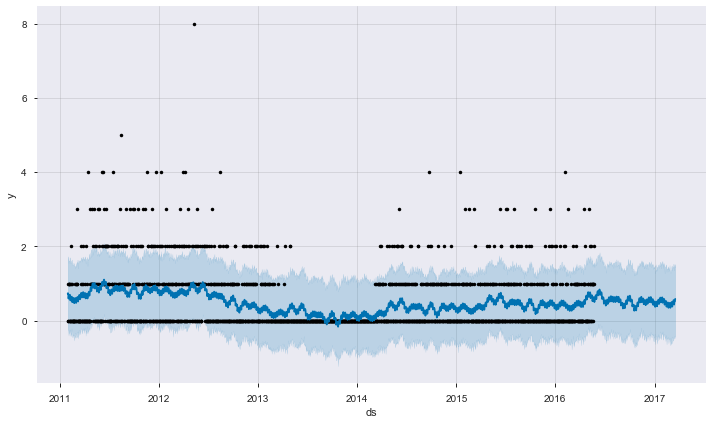

In [72]:
m = Prophet()
m.fit(train_dataset)

future= m.make_future_dataframe(periods=300)

forecast=m.predict(future)
fig1 =m.plot(forecast)



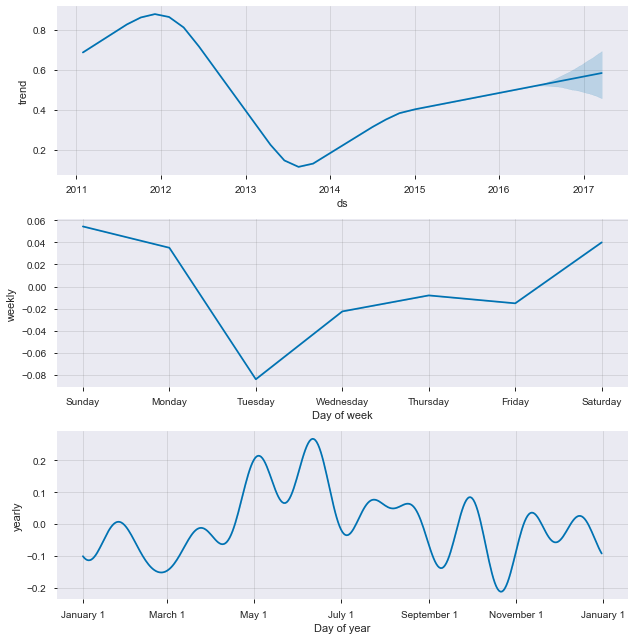

In [73]:
fig1 = m.plot_components(forecast)

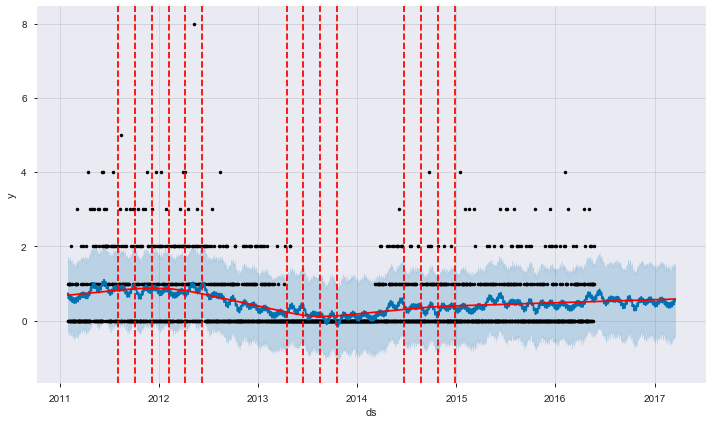

In [74]:
fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast)

In [75]:
m.changepoints

62     2011-04-01
124    2011-06-02
186    2011-08-03
248    2011-10-04
310    2011-12-05
372    2012-02-05
434    2012-04-07
496    2012-06-08
558    2012-08-09
620    2012-10-10
682    2012-12-11
744    2013-02-11
807    2013-04-15
869    2013-06-16
931    2013-08-17
993    2013-10-18
1055   2013-12-19
1117   2014-02-19
1179   2014-04-22
1241   2014-06-23
1303   2014-08-24
1365   2014-10-25
1427   2014-12-26
1489   2015-02-26
1551   2015-04-29
Name: ds, dtype: datetime64[ns]

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


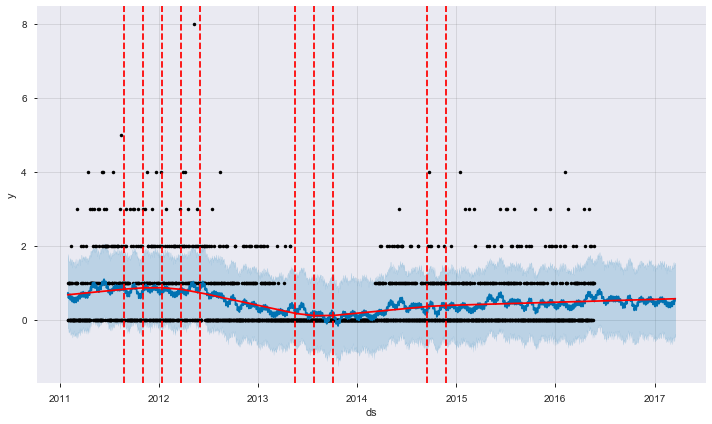

In [76]:
pro_change= Prophet(changepoint_range=0.9)
forecast = pro_change.fit(train_dataset).predict(future)
fig= pro_change.plot(forecast);
a = add_changepoints_to_plot(fig.gca(), pro_change, forecast)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


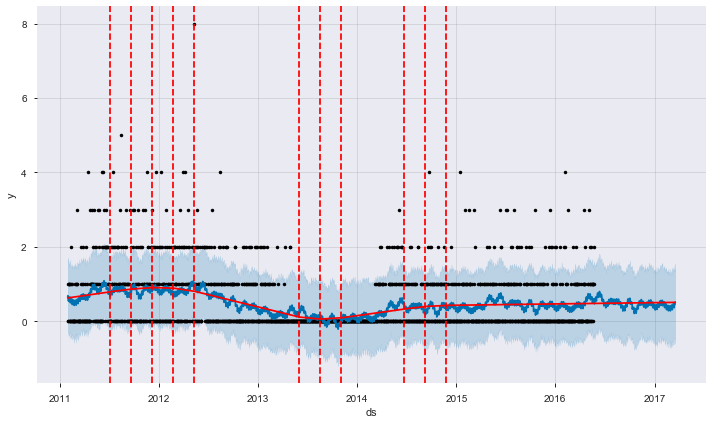

In [77]:
# Adjusting the trend. Default changepoint_prior_scale is 0.05; increase to get more flex on trend

pro_change= Prophet(n_changepoints=20, yearly_seasonality=True, changepoint_prior_scale=0.08)
forecast = pro_change.fit(train_dataset).predict(future)
fig= pro_change.plot(forecast);
a = add_changepoints_to_plot(fig.gca(), pro_change, forecast)

In [78]:
# Adding holidays or events that can affect the time series values.
# Use windows to extend the effect to previous (-) or next (+) days.

avocado_season = pd.DataFrame({
  'holiday': 'avocado season',
  'ds': pd.to_datetime(['2014-07-31', '2014-09-16', 
                        '2015-07-31', '2015-09-16',
                        '2016-07-31', '2016-09-16',
                        '2017-07-31', '2017-09-16',
                       '2018-07-31', '2018-09-16',
                        '2019-07-31', '2019-09-16']),
  'lower_window': -1,
  'upper_window': 0,
})

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


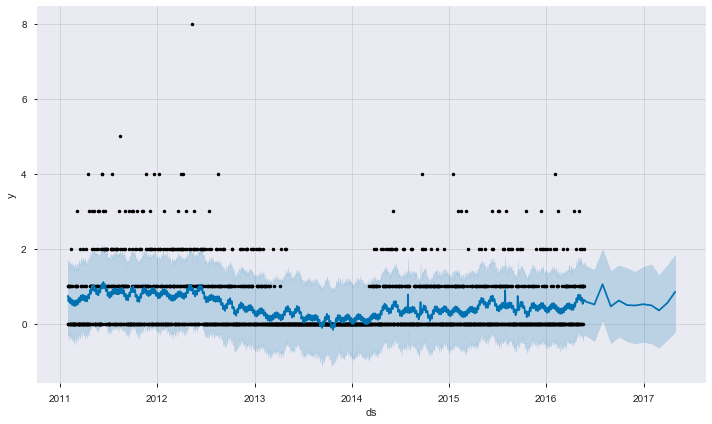

In [79]:
pro_holiday= Prophet(holidays=avocado_season)
pro_holiday.fit(train_dataset)
future_data = pro_holiday.make_future_dataframe(periods=12, freq = 'm')
 
#forecast the data for future data
forecast_data = pro_holiday.predict(future_data)
pro_holiday.plot(forecast_data);

In [80]:
# Adding multiple regressors

train_dataset['wday'] = df_input['wday']
train_X= train_dataset[:1500]
test_X= train_dataset[1500:]

<ipython-input-80-76acfff2f70d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_dataset['wday'] = df_input['wday']


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


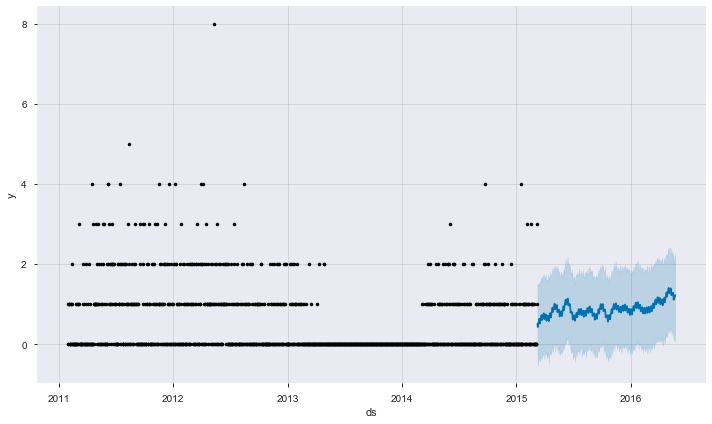

In [81]:
#Additional Regressor
pro_regressor= Prophet()
pro_regressor.add_regressor('wday')

#Fitting the data
pro_regressor.fit(train_X)
future_data = pro_regressor.make_future_dataframe(periods=60)

#forecast the data for Test  data
forecast_data = pro_regressor.predict(test_X)
pro_regressor.plot(forecast_data);

In [84]:
df_cv = cross_validation(m, initial='1500 days', period='180 days', horizon = '365 days')
df_cv.head()

INFO:fbprophet:Making 1 forecasts with cutoffs between 2015-05-23 00:00:00 and 2015-05-23 00:00:00


,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2015-05-24,0.683339,-0.265292,1.618837,0,2015-05-23
1,2015-05-25,0.631132,-0.361627,1.612930,0,2015-05-23
2,2015-05-26,0.555183,-0.392944,1.543735,0,2015-05-23
3,2015-05-27,0.628637,-0.368019,1.569408,0,2015-05-23
4,2015-05-28,0.677895,-0.296073,1.616481,0,2015-05-23


In [85]:
df_p = performance_metrics(df_cv)
df_p.head()

INFO:fbprophet:Skipping MAPE because y close to 0


,horizon,mse,rmse,mae,mdape,coverage
0,36 days,0.652340,0.807676,0.735415,inf,0.888889
1,37 days,0.648112,0.805054,0.732017,inf,0.888889
2,38 days,0.642792,0.801743,0.727119,inf,0.888889
3,39 days,0.641130,0.800706,0.725541,inf,0.888889
4,40 days,0.636589,0.797866,0.721451,inf,0.888889


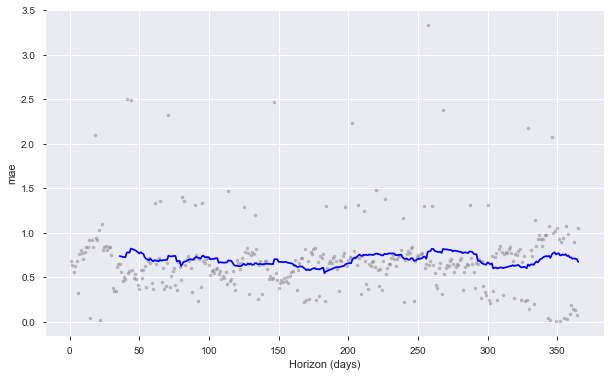

In [90]:
fig = plot_cross_validation_metric(df_cv, metric='mae')